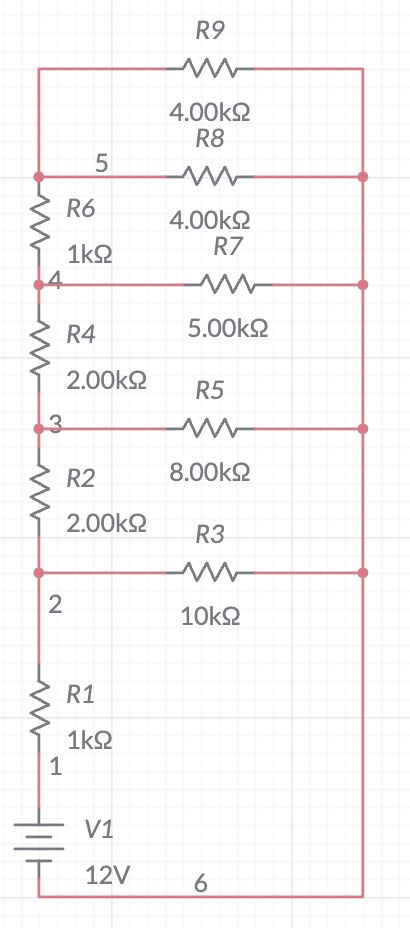

# Análisis de Circuito 

Componentes planteados:

*   Una fuente de voltaje: `Vs`
*   Nueve resistencias: `R1, R2, R3, R4, R5, R6, R7, R8, R9`

**Incógnitas:**
*   Los voltajes en los nodos `V1, V2, V3, V4`.


### Ley de Corrientes de Kirchhoff - análisis nodal

El principio del análisis nodal establece que la suma algebráica de las corrientes que salen de un nodo es igual a cero. Para simplificar, se trabajarea con **conductancias (G)**, donde `G = 1/R`.

####  Nodo 1 (V1)

Suma de corrientes salientes de `V1`:
`(V1 - Vs)/R1 + (V1 - V2)/R2 + V1/R3 = 0`

Agrupando:
`V1 * (1/R1 + 1/R2 + 1/R3) - V2 * (1/R2) = Vs/R1`

En términos de conductancia:
**`V1 * (G1 + G2 + G3) - V2 * G2 = Vs * G1`**  (Ecuación 1)

#### Nodo 2 (V2)

Suma de corrientes salientes de `V2`:
`(V2 - V1)/R2 + (V2 - V3)/R4 + V2/R5 = 0`

Agrupando:
`-V1 * (1/R2) + V2 * (1/R2 + 1/R4 + 1/R5) - V3 * (1/R4) = 0`

En términos de conductancia:
**`-V1 * G2 + V2 * (G2 + G4 + G5) - V3 * G4 = 0`** (Ecuación 2)

#### Nodo 3 (V3)

Suma de corrientes salientes `V3`:
`(V3 - V2)/R4 + (V3 - V4)/R6 + V3/R7 = 0`

Agrupando:
`-V2 * (1/R4) + V3 * (1/R4 + 1/R6 + 1/R7) - V4 * (1/R6) = 0`

En términos de conductancia:
**`-V2 * G4 + V3 * (G4 + G6 + G7) - V4 * G6 = 0`** (Ecuación 3)

#### Nodo 4 (V4)

Suma de corrientes salientes de `V4` es:
`(V4 - V3)/R6 + V4/R8 + V4/R9 = 0`

Agrupando términos:
`-V3 * (1/R6) + V4 * (1/R6 + 1/R8 + 1/R9) = 0`

En términos de conductancia:
**`-V3 * G6 + V4 * (G6 + G8 + G9) = 0`** (Ecuación 4)

### Construcción de la Matriz Tridiagonal

El sistema de ecuaciones lineales se puede expresar en la forma matricial **A * x = b**.

*   Vector de incógnitas: **x** = `[V1, V2, V3, V4]`
*   Vector de fuentes: **b** = `[Vs*G1, 0, 0, 0]`

La matriz de conductancias **A** es:

|                 | V1              | V2                  | V3                  | V4              |
| :-------------- | :---------------- | :-------------------- | :-------------------- | :---------------- |
| **Ecuación 1**  | `G1 + G2 + G3`    | `-G2`                 | `0`                   | `0`               |
| **Ecuación 2**  | `-G2`             | `G2 + G4 + G5`        | `-G4`                 | `0`               |
| **Ecuación 3**  | `0`               | `-G4`                 | `G4 + G6 + G7`        | `-G6`             |
| **Ecuación 4**  | `0`               | `0`                   | `-G6`                 | `G6 + G8 + G9`    |


### Reemplazando para el ejemplo Numérico



*   `Vs = 12 V`
*   `R1 = 1 kΩ`  (G1 = 0.001 S)
*   `R2 = 2 kΩ`  (G2 = 0.0005 S)
*   `R3 = 10 kΩ` (G3 = 0.0001 S)
*   `R4 = 2 kΩ`  (G4 = 0.0005 S)
*   `R5 = 8 kΩ`  (G5 = 0.000125 S)
*   `R6 = 1 kΩ`  (G6 = 0.001 S)
*   `R7 = 5 kΩ`  (G7 = 0.0002 S)
*   `R8 = 4 kΩ`  (G8 = 0.00025 S)
*   `R9 = 4 kΩ`  (G9 = 0.00025 S)


Se obtiene la siguiente matriz tridiagonal:

| 0.0016 -0.0005 0.0 0.0 | | V1 | | 0.012 |

| -0.0005 0.001125 -0.0005 0.0 | | V2 | | 0 |

| 0.0 -0.0005 0.0017 -0.001 | * | V3 | = | 0 |

| 0.0 0.0 -0.001 0.0015 | | V4 | | 0 |



In [3]:
import numpy as np

def crout_tridiagonal(A):

    # Descomposicíon LU de una matriz tridiagonal. U tiene 1s en la diagonal principal.
    
    #Entra: A (np.array): Matriz tridiagonal cuadrada.
        
    # Devuelve: L (np.array): Matriz triangular inferior (bidiagonal), U (np.array): Matriz triangular superior (bidiagonal con 1s en la diagonal).

    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    # Establecer la diagonal de U en 1
    np.fill_diagonal(U, 1)

    # Primer elemento (caso especial)
    if A[0, 0] == 0:
        raise ValueError("El método falla: A[0,0] es cero.")
    L[0, 0] = A[0, 0]
    U[0, 1] = A[0, 1] / L[0, 0]

    # Iterar para el resto de las filas
    for i in range(1, n):
        # Calcular elementos de L
        L[i, i-1] = A[i, i-1]
        L[i, i] = A[i, i] - L[i, i-1] * U[i-1, i]
        
        if L[i, i] == 0:
            raise ValueError(f"El método falla: L[{i},{i}] es cero. La matriz puede ser singular.")
            
        # Calcular elementos de U (si no es la última fila)
        if i < n - 1:
            U[i, i+1] = A[i, i+1] / L[i, i]
            
    return L, U

def forward_substitution(L, b):
    # Resuelve el sistema Ly = b para y. Devuelve vector solución intermedio y.

    n = len(L)
    y = np.zeros(n)
    
    # Primer elemento
    y[0] = b[0] / L[0, 0]
    
    # Iterar hacia adelante
    for i in range(1, n):
        y[i] = (b[i] - L[i, i-1] * y[i-1]) / L[i, i]
        
    return y

def backward_substitution(U, y):
    # Resuelve Ux = y para x. Devuelve vector solución final x.

    n = len(U)
    x = np.zeros(n)
    
    # Último elemento (la diagonal de U es 1)
    x[n-1] = y[n-1]
    
    # Iterar hacia atrás
    for i in range(n-2, -1, -1):
        x[i] = y[i] - U[i, i+1] * x[i+1]
        
    return x

#Definición del sistema a resolver
# Matriz de conductancias A
A = np.array([
    [ 0.0016, -0.0005,  0.0,      0.0   ],
    [-0.0005,  0.001125,-0.0005,  0.0   ],
    [ 0.0,     -0.0005,  0.0017,  -0.001 ],
    [ 0.0,      0.0,     -0.001,   0.0015]
])

# Vector de fuentes b
b = np.array([0.012, 0.0, 0.0, 0.0])

print("--- Sistema a Resolver (Ax = b) ---")
print("Matriz A:\n", A)
print("\nVector b:\n", b)
print("-" * 35)

try:
    # --- Descomposición de Crout (A = LU) ---
    L, U = crout_tridiagonal(A)
    print("\n--- Descomposición de Crout (A = LU) ---")
    print("Matriz L:\n", np.round(L, 6))
    print("\nMatriz U:\n", np.round(U, 6))
    print("-" * 35)

    # --- Sustitución hacia adelante (Ly = b) ---
    y = forward_substitution(L, b)
    print("\n--- Sustitución hacia Adelante (Ly = b) ---")
    print("Vector y:\n", y)
    print("-" * 35)

    # ---Sustitución hacia atrás (Ux = b) ---
    x = backward_substitution(U, y)
    print("\n--- Sustitución hacia Atrás (Ux = y) ---")
    print("Vector solución x (Voltajes):\n", x)
    print("-" * 35)

    # --- Resultados Finales y Verificación ---
    print("\n--- Resultados Finales ---")
    for i, voltaje in enumerate(x):
        # Corresponde a los nodos 2, 3, 4, 5 del diagrama o 1,2,3,4 en planteamiento inicial teórico
        print(f"Voltaje en el Nodo {i+2} (V{i+1}): {voltaje:.4f} V")
        
    # Verificación
    print("\n--- Verificación (A * x) ---")
    b_calculado = A @ x
    print("El resultado de A*x es:\n", b_calculado)
    print("\n¿Es A*x aproximadamente igual a b?", np.allclose(b_calculado, b))

except ValueError as e:
    print(f"Error: {e}")


--- Sistema a Resolver (Ax = b) ---
Matriz A:
 [[ 0.0016   -0.0005    0.        0.      ]
 [-0.0005    0.001125 -0.0005    0.      ]
 [ 0.       -0.0005    0.0017   -0.001   ]
 [ 0.        0.       -0.001     0.0015  ]]

Vector b:
 [0.012 0.    0.    0.   ]
-----------------------------------

--- Descomposición de Crout (A = LU) ---
Matriz L:
 [[ 0.0016    0.        0.        0.      ]
 [-0.0005    0.000969  0.        0.      ]
 [ 0.       -0.0005    0.001442  0.      ]
 [ 0.        0.       -0.001     0.000806]]

Matriz U:
 [[ 1.       -0.3125    0.        0.      ]
 [ 0.        1.       -0.516129  0.      ]
 [ 0.        0.        1.       -0.693512]
 [ 0.        0.        0.        1.      ]]
-----------------------------------

--- Sustitución hacia Adelante (Ly = b) ---
Vector y:
 [7.5        3.87096774 1.34228188 1.66435506]
-----------------------------------

--- Sustitución hacia Atrás (Ux = y) ---
Vector solución x (Voltajes):
 [9.11234397 5.15950069 2.49653259 1.66435506]
--

Se verifica con el simulador: 

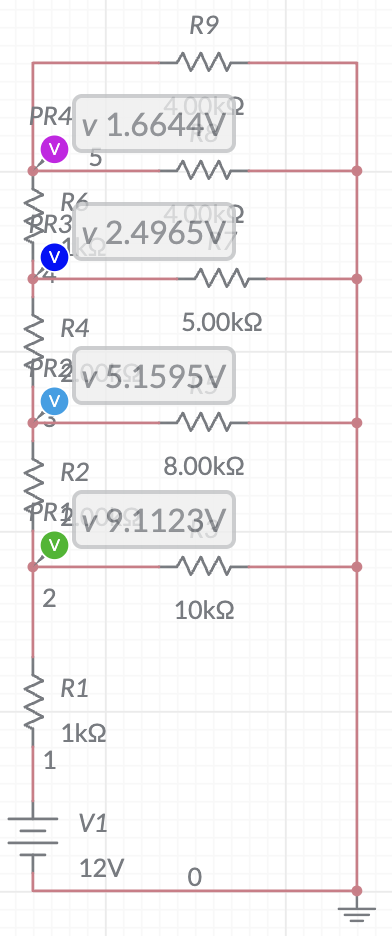

## Resultados

- De las más importantes observaciones es que los resultados tienen sentido físico con un patrón observable y esperado: 12V (Fuente) > 9.375V (Nodo 2) > 5.025V (Nodo 3) > 2.500V (Nodo 4) > 1.625V (Nodo 5) > 0V (Tierra). El descenso en el voltaje es lo que se puede esperar en un circuito divisor de tensión como el planteado. 

- Pese a que el circuito como tal no se vea muy complejo, es de las reducciones más comunes a las que se llegan de circuitos resistivos más complejos. La simplicidad se traduce en eficiencia computacional. 